In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


data = pd.read_csv('dataset/in_and_out.csv', encoding='cp949')
data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202504,1호선,동대문,650,26,11355,2005,10238,7181,18411,...,9939,938,3210,3,321,0,0,0,0,20250503
1,202504,1호선,동묘앞,117,3,2844,819,4206,5444,9689,...,4897,120,1996,3,267,0,0,0,0,20250503
2,202504,1호선,서울역,712,48,10654,9668,29272,64058,97455,...,29252,5212,8018,10,262,0,0,0,0,20250503
3,202504,1호선,시청,124,5,2267,5900,3888,28761,7841,...,3763,606,1015,0,15,0,0,0,0,20250503
4,202504,1호선,신설동,381,18,9393,2330,10420,9020,24157,...,9416,455,3039,0,0,1,2,0,0,20250503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,202305,중앙선,원덕,95,0,394,6,740,182,885,...,328,3,80,0,0,0,0,0,0,20230603
14858,202305,중앙선,중랑,153,5,6886,593,10126,2329,24074,...,5311,34,486,0,0,0,0,0,0,20230603
14859,202305,중앙선,지평,0,0,0,0,4,2,384,...,0,0,0,0,0,0,0,0,0,20230603
14860,202305,중앙선,팔당,0,0,259,78,726,728,1658,...,202,0,0,0,0,0,0,0,0,20230603


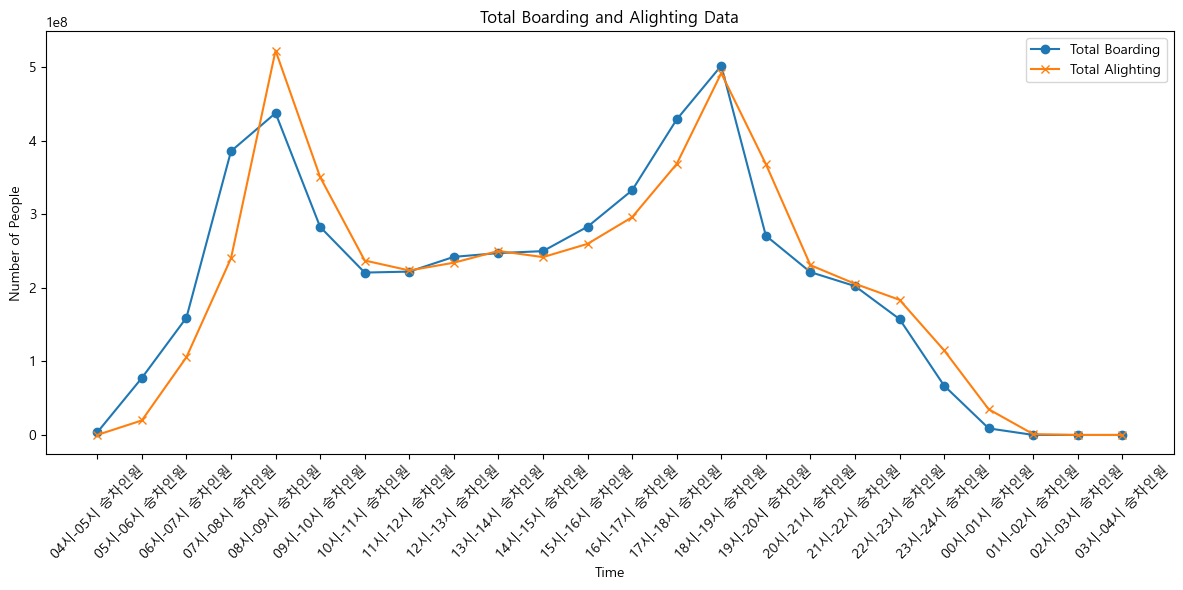

In [2]:
boarding_cols = [col for col in data.columns if '승차인원' in col]
# '승차인원'이 포함된 컬럼명을 모두 추출 (시간대별 승차 인원)

alighting_cols = [col for col in data.columns if '하차인원' in col]
# '하차인원'이 포함된 컬럼명을 모두 추출 (시간대별 하차 인원)

boarding_data = data[boarding_cols].sum(axis=1)
# 각 행(관측치)별로 모든 시간대 승차 인원을 합산

alighting_data = data[alighting_cols].sum(axis=1)
# 각 행(관측치)별로 모든 시간대 하차 인원을 합산

grouped = data.groupby('사용월')
# '사용월' 컬럼을 기준으로 데이터 그룹화 (월별 집계 목적)

grouped_boarding = grouped[boarding_cols].sum()
# 월별로 각 시간대 승차 인원 합계 집계

grouped_alighting = grouped[alighting_cols].sum()
# 월별로 각 시간대 하차 인원 합계 집계

plt.figure(figsize=(12, 6))
plt.plot(boarding_cols, data[boarding_cols].sum(), label='Total Boarding', marker='o')
# 전체 데이터에서 시간대별 승차 인원 합계를 선 그래프로 시각화 (마커: 원형)

plt.plot(boarding_cols, data[alighting_cols].sum(), label='Total Alighting', marker='x')
# 전체 데이터에서 시간대별 하차 인원 합계를 선 그래프로 시각화 (마커: x)
# x축을 boarding_cols로 통일하여 시간대별 비교가 용이하도록 함

plt.title('Total Boarding and Alighting Data')
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
# 시간대별 컬럼 정렬
time_cols = [col for col in data.columns if '승차' in col or '하차' in col]
# '승차' 또는 '하차'가 포함된 컬럼만 추출

time_order = sorted(set(col.split()[0] for col in time_cols), key=lambda x: int(x[:2])*60+int(x[3:5]))
# 시간대(예: '06:00', '06:30' 등)만 추출 후, 시각 순서대로 정렬

ordered_cols = []
for t in time_order:
    ordered_cols.append(f'{t} 승차인원')
    ordered_cols.append(f'{t} 하차인원')
# 시간대별로 승차/하차 컬럼을 순서대로 정렬

data = data[['사용월', '호선명', '지하철역'] + ordered_cols]
# 메타데이터(사용월, 호선명, 지하철역)와 정렬된 시간대별 승차/하차 컬럼으로 데이터프레임 재구성

# 월 기준 훈련/테스트 분할
train = data[data['사용월'] < 202501]
test = data[data['사용월'] >= 202501]
# 2025년 1월 이전은 훈련, 2025년 1월 이후는 테스트로 분할

# 머신러닝 입력/출력 데이터 생성 (슬라이딩 윈도우 방식)
def make_ml_data(df, window_size=3, target_offset=1):
    X, y = [], []
    arr = df[ordered_cols].values
    for i in range(len(arr) - window_size - target_offset + 1):
        X.append(arr[i:i+window_size].flatten())
        y.append(arr[i+window_size+target_offset-1][:2])  # 예: 다음 시간대 승차/하차
    return np.array(X), np.array(y)

X_train, y_train = make_ml_data(train)
X_test, y_test = make_ml_data(test)
# 훈련/테스트 데이터셋에 대해 슬라이딩 윈도우로 입력(X), 타깃(y) 생성

# 데이터 스케일링 (X만 수행)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)



In [4]:
# 여러 회귀 모델을 딕셔너리로 정의
models = {
    'DecisionTree': MultiOutputRegressor(DecisionTreeRegressor(random_state=42)),  # 결정트리 회귀(다중 출력)
    'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_estimators=20, random_state=42)),  # 랜덤포레스트 회귀(다중 출력)
    'XGBoost': MultiOutputRegressor(XGBRegressor(tree_method='hist', n_jobs=-1)),  # XGBoost 회귀(다중 출력)
    'LightGBM': MultiOutputRegressor(LGBMRegressor(n_jobs=-1)),  # LightGBM 회귀(다중 출력)
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=200, batch_size=256, random_state=42)  # 다층 퍼셉트론 회귀
}

results = {}  # 각 모델의 성능 결과를 저장할 딕셔너리
for name, model in models.items():  # 모델명과 모델 객체를 반복
    model.fit(X_train_scaled, y_train)  # 훈련 데이터로 모델 학습
    y_pred = model.predict(X_test_scaled)  # 테스트 데이터로 예측값 생성
    
    mse = mean_squared_error(y_test, y_pred)  # 평균제곱오차(MSE) 계산
    r2 = r2_score(y_test, y_pred)             # 결정계수(R2) 계산
    
    results[name] = {'MSE': mse, 'R2': r2}    # 결과 딕셔너리에 저장
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')  # 각 모델별 성능 출력

# 결과 비교 표 출력
print("\n최종 성능 비교:")
for model, scores in results.items():  # 모델명과 성능 점수 반복
    print(f"{model:15} | MSE: {scores['MSE']:.1f} | R²: {scores['R2']:.2f}")  # 정렬된 포맷으로 출력



DecisionTree - MSE: 893194.65, R2: 0.74
RandomForest - MSE: 269878.27, R2: 0.92
XGBoost - MSE: 421707.94, R2: 0.89
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32746
[LightGBM] [Info] Number of data points in the train set: 12376, number of used features: 141
[LightGBM] [Info] Start training from score 605.288866
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32746
[LightGBM] [Info] Number of data points in the train set: 12376, number of used features: 141
[LightGBM] [Info] Start training from score 2375.039189


c:\Users\kkh01\llll\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\kkh01\llll\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM - MSE: 364106.40, R2: 0.90
MLPRegressor - MSE: 483227.03, R2: 0.84

최종 성능 비교:
DecisionTree    | MSE: 893194.6 | R²: 0.74
RandomForest    | MSE: 269878.3 | R²: 0.92
XGBoost         | MSE: 421707.9 | R²: 0.89
LightGBM        | MSE: 364106.4 | R²: 0.90
MLPRegressor    | MSE: 483227.0 | R²: 0.84


c:\Users\kkh01\llll\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


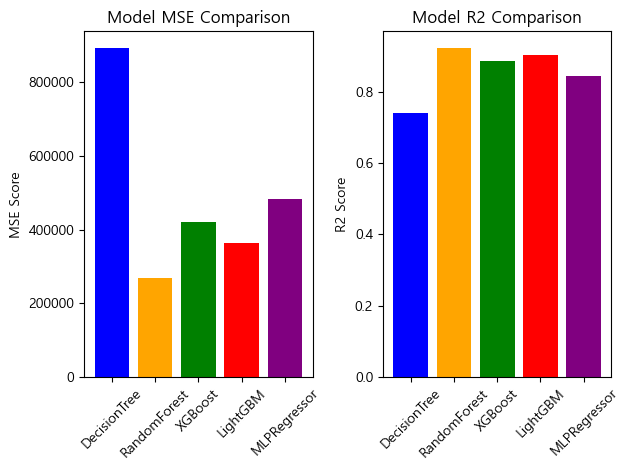

In [5]:
r2_values = [scores['R2'] for scores in results.values()]  # 각 모델별 R2 점수 추출
colors = ['blue', 'orange', 'green', 'red', 'purple']      # 막대그래프에 사용할 색상 리스트 정의

mse_values = [scores['MSE'] for scores in results.values()]  # 각 모델별 MSE 점수 추출

plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 서브플롯 생성
plt.bar(list(models.keys()), mse_values, color=colors)  # 모델별 MSE 막대그래프
plt.title('Model MSE Comparison')      # 그래프 제목
plt.ylabel('MSE Score')               # y축 레이블
plt.xticks(rotation=45)               # x축 모델명 라벨 45도 회전

# R2 바 차트
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 서브플롯 생성
plt.bar(list(models.keys()), r2_values, color=colors)   # 모델별 R2 막대그래프
plt.title('Model R2 Comparison')      # 그래프 제목
plt.ylabel('R2 Score')                # y축 레이블
plt.xticks(rotation=45)               # x축 모델명 라벨 45도 회전

plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()          # 모든 그래프 출력

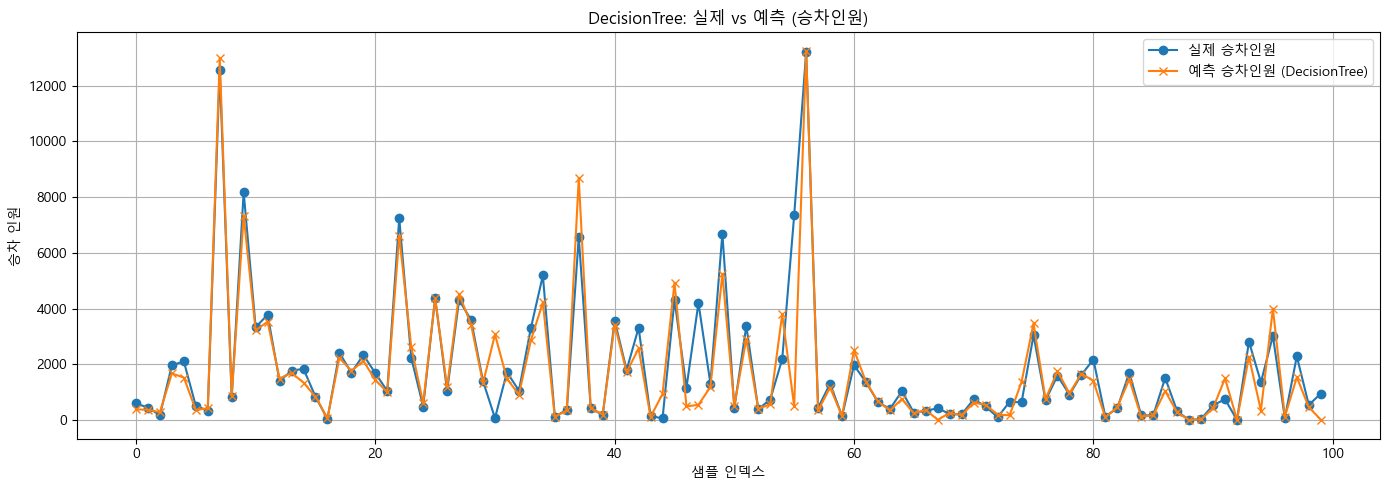

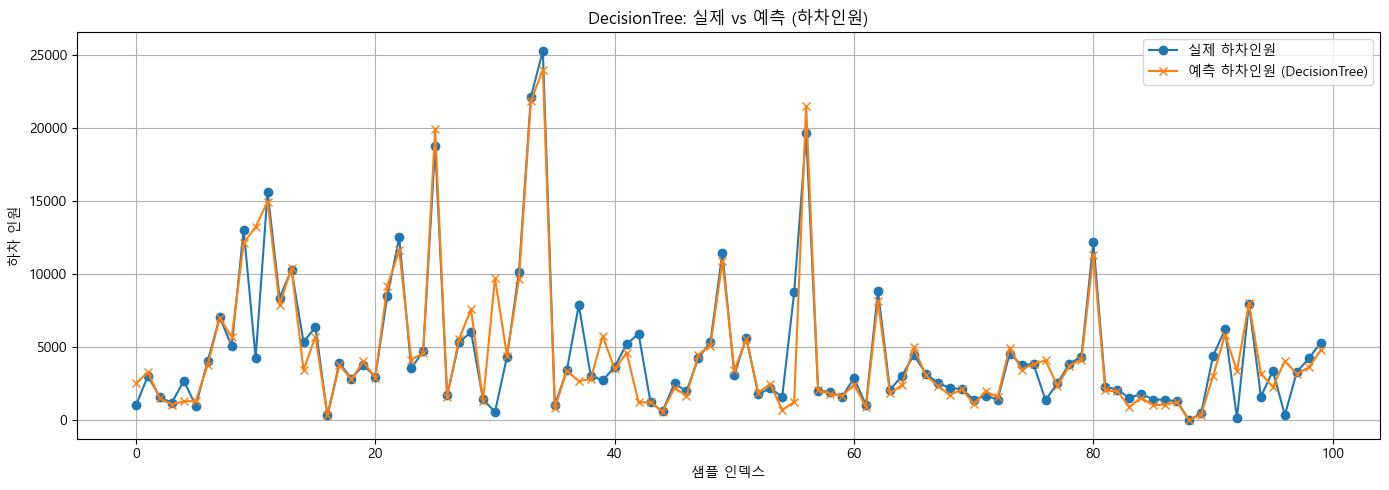

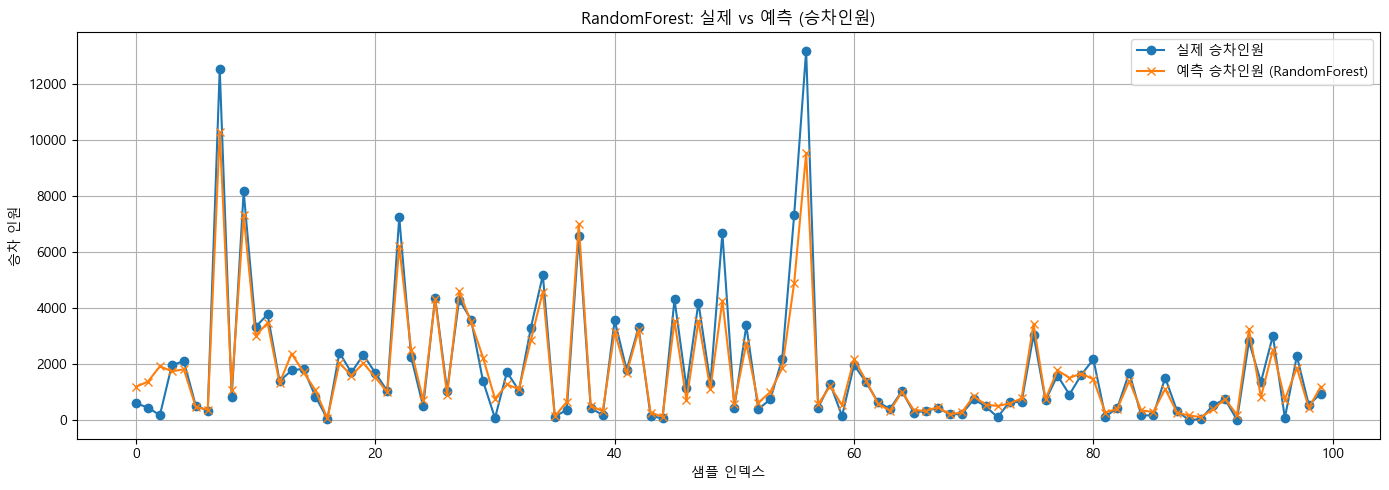

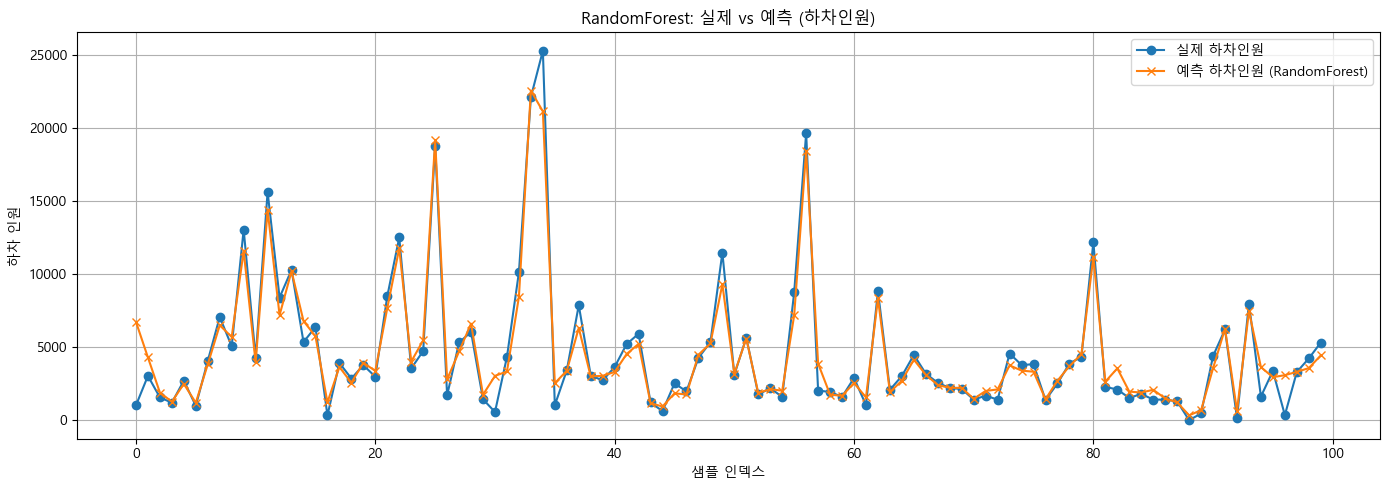

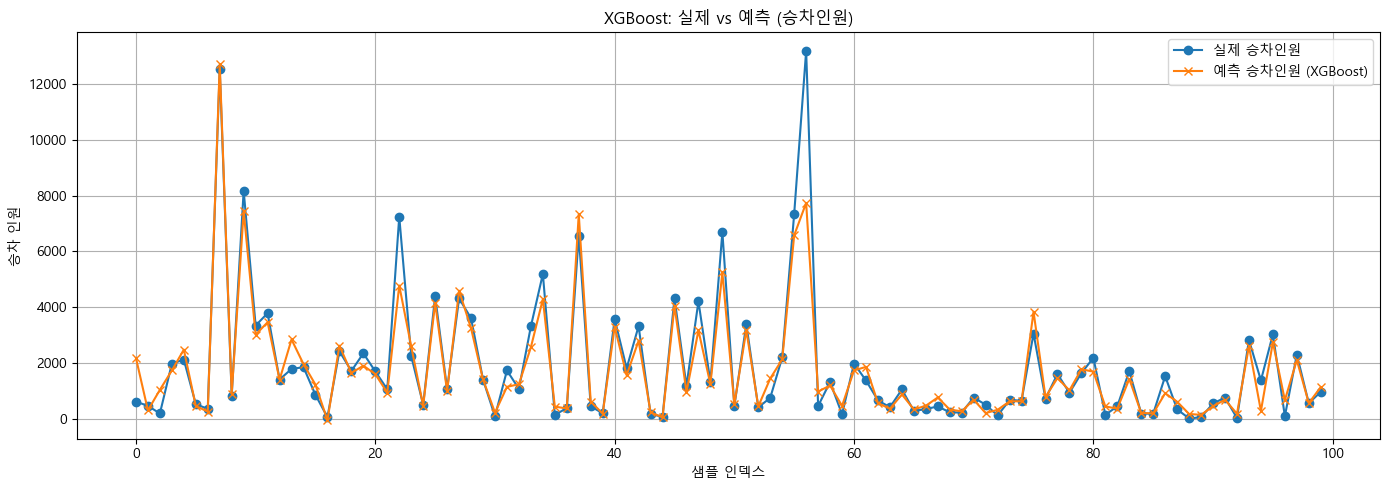

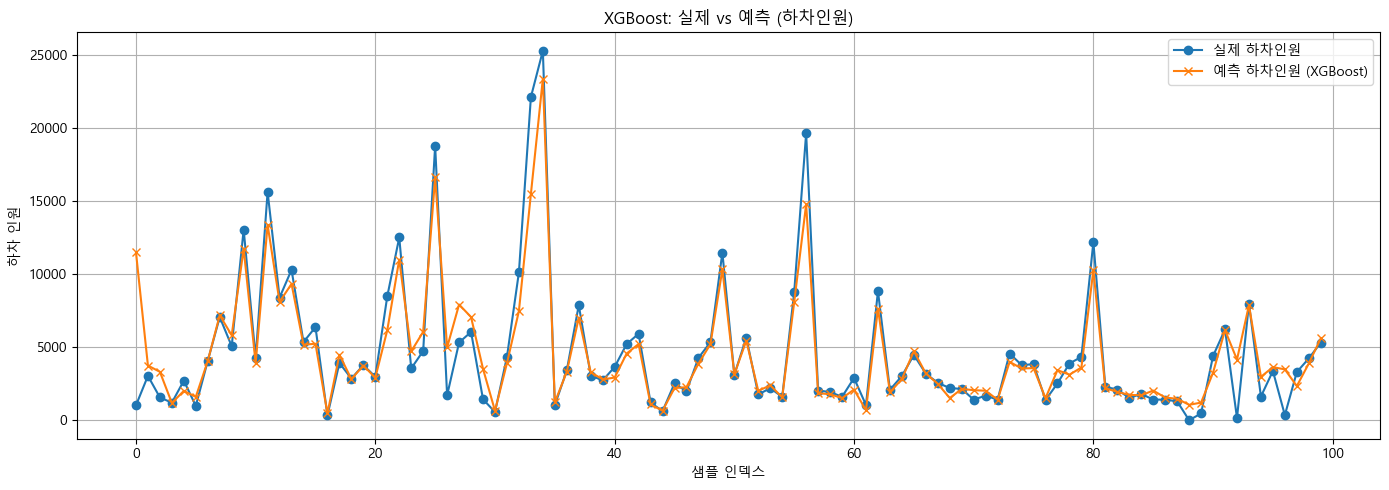

c:\Users\kkh01\llll\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\kkh01\llll\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


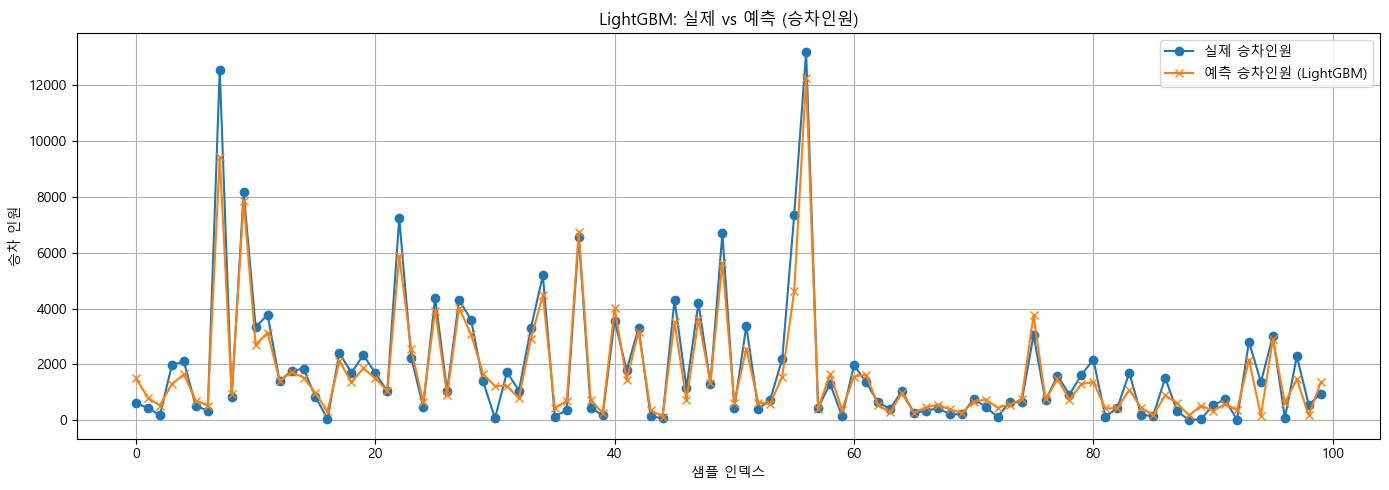

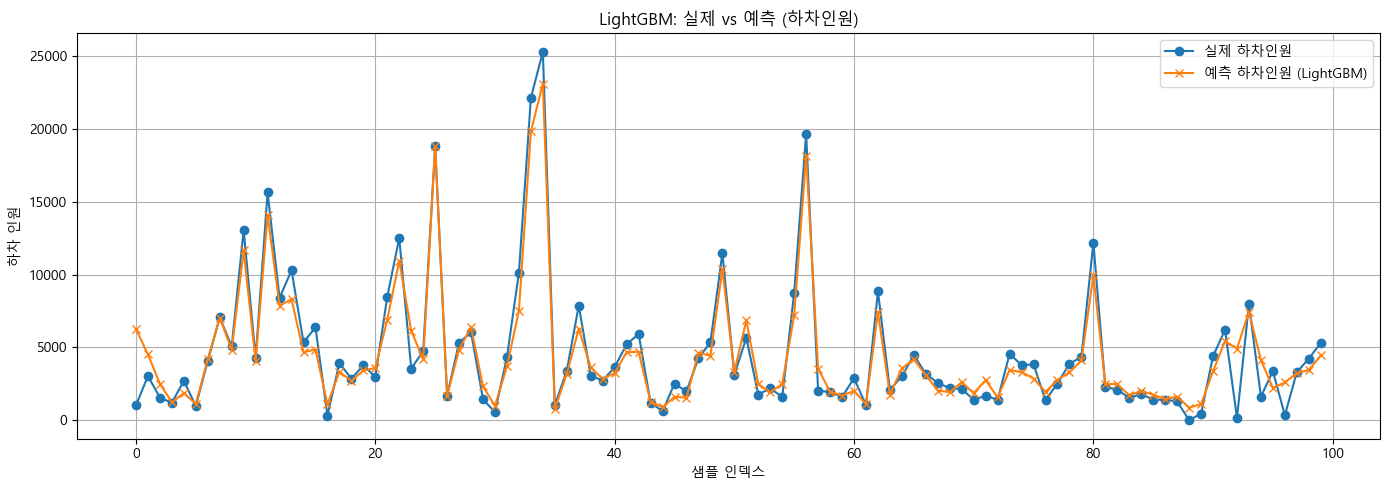

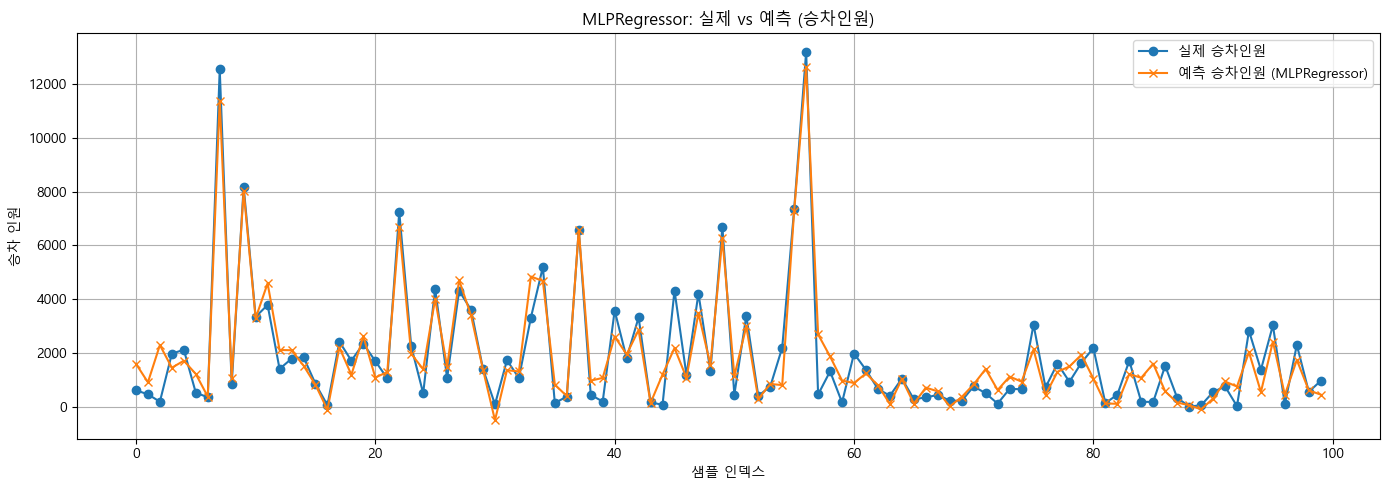

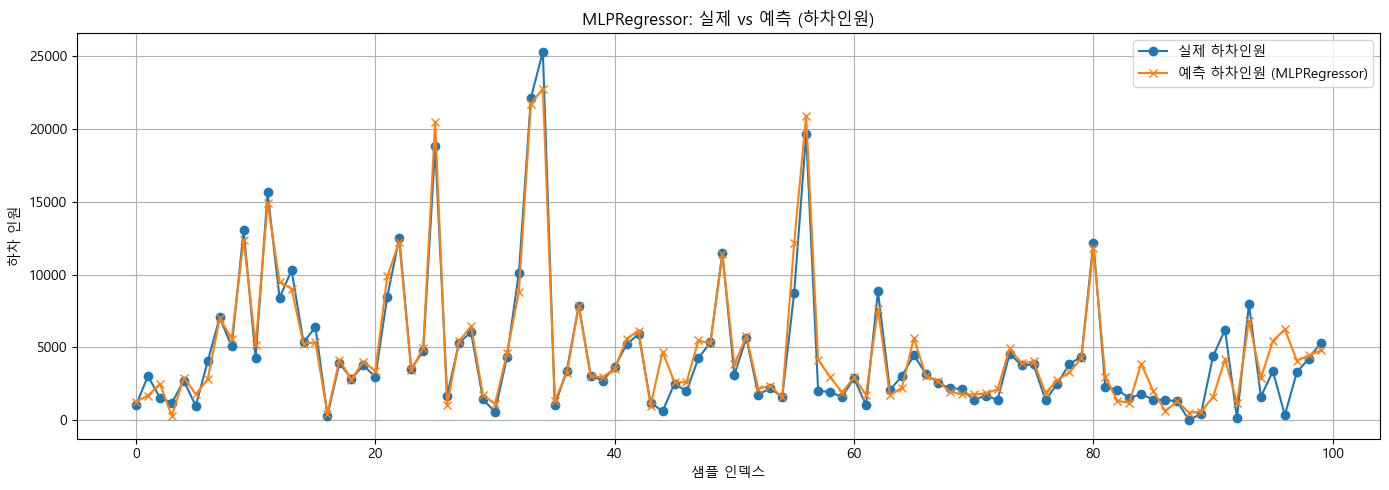

In [6]:
def plot_actual_vs_predicted(models, X_test_scaled, y_test, num_samples=100):
    """
    모든 모델에 대해 실제값과 예측값을 승차/하차별로 시각화합니다.
    models: 모델 딕셔너리 (이름: 모델 객체)
    X_test_scaled: 테스트 입력 데이터 (스케일링된 상태)
    y_test: 테스트 타깃 데이터 (실제값)
    num_samples: 시각화할 샘플 개수
    """
    for name, model in models.items():
        y_pred = model.predict(X_test_scaled)  # 각 모델별로 테스트 데이터에 대한 예측값 생성

        # 승차인원 시각화
        plt.figure(figsize=(14, 5))  # 그래프 크기 설정
        plt.plot(
            range(num_samples),               # x축: 샘플 인덱스
            y_test[:num_samples, 0],          # y축: 실제 승차인원
            label='실제 승차인원', marker='o'  # 실제값(원형 마커)
        )
        plt.plot(
            range(num_samples),               # x축: 샘플 인덱스
            y_pred[:num_samples, 0],          # y축: 예측 승차인원
            label=f'예측 승차인원 ({name})', marker='x'  # 예측값(엑스 마커)
        )
        plt.title(f'{name}: 실제 vs 예측 (승차인원)')  # 그래프 제목
        plt.xlabel('샘플 인덱스')                      # x축 레이블
        plt.ylabel('승차 인원')                        # y축 레이블
        plt.legend()                                  # 범례 표시
        plt.grid(True)                                # 격자 표시
        plt.tight_layout()                            # 레이아웃 자동 조정
        plt.show()                                    # 그래프 출력

        # 하차인원 시각화
        plt.figure(figsize=(14, 5))  # 그래프 크기 설정
        plt.plot(
            range(num_samples),               # x축: 샘플 인덱스
            y_test[:num_samples, 1],          # y축: 실제 하차인원
            label='실제 하차인원', marker='o'  # 실제값(원형 마커)
        )
        plt.plot(
            range(num_samples),               # x축: 샘플 인덱스
            y_pred[:num_samples, 1],          # y축: 예측 하차인원
            label=f'예측 하차인원 ({name})', marker='x'  # 예측값(엑스 마커)
        )
        plt.title(f'{name}: 실제 vs 예측 (하차인원)')  # 그래프 제목
        plt.xlabel('샘플 인덱스')                      # x축 레이블
        plt.ylabel('하차 인원')                        # y축 레이블
        plt.legend()                                  # 범례 표시
        plt.grid(True)                                # 격자 표시
        plt.tight_layout()                            # 레이아웃 자동 조정
        plt.show()                                    # 그래프 출력

# 사용 예시
plot_actual_vs_predicted(models, X_test_scaled, y_test, num_samples=100)

